# Neural Network Model - 분류

## 실습용 데이터 설정
* iris.csv

In [1]:
!ls -l

total 8
-rw-r--r-- 1 root root 3867 Feb 16 01:39 iris.csv
drwxr-xr-x 1 root root 4096 Feb  5 18:37 sample_data


* pandas DataFrame

In [2]:
import pandas as pd

DF = pd.read_csv('iris.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
DF.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


# I. 탐색적 데이터 분석

> ## 1) 빈도분석

In [4]:
DF.Species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: Species, dtype: int64

> ## 2) 분포 시각화

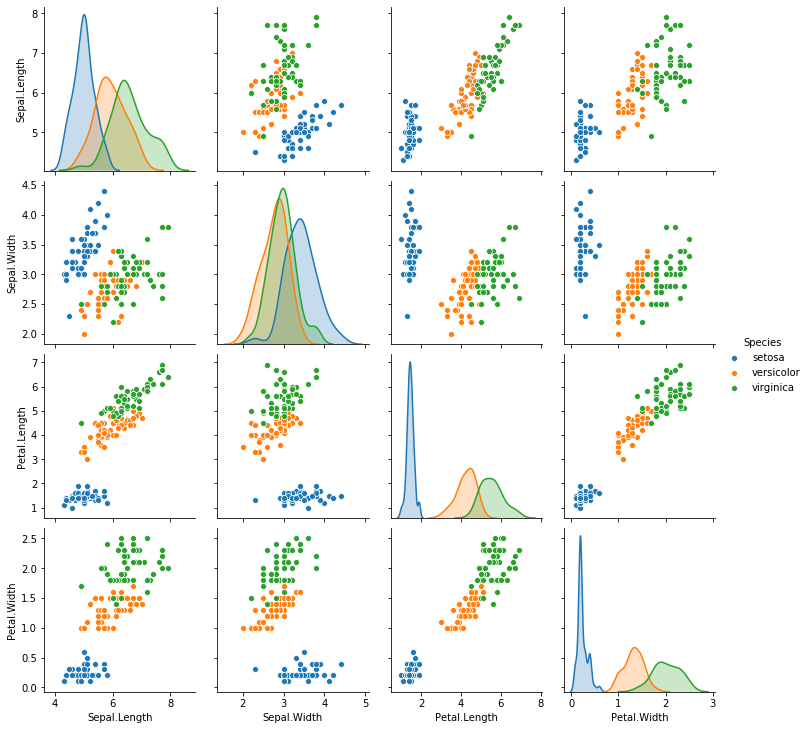

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(hue = 'Species', data = DF)
plt.show()

# II. Data Preprocessing

> ## 1) Standardization

In [0]:
from sklearn.preprocessing import StandardScaler

X = DF[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]
y = DF['Species']

scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

> ## 2) Train & Test Split

* 7: 3

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (105, 4) (105,)
Test Data :  (45, 4) (45,)


# III. Modeling

> ## 1) Train_Data로 모델 생성

* hidden_layer_sizes : 은닉층 노드의 개수
* activation : 활성화 함수
* solver : 최적화 기법
* max_iter : 학습 반복 횟수

In [57]:
from sklearn.neural_network import MLPClassifier

Model_NN = MLPClassifier(hidden_layer_sizes = (5),
                         activation = 'logistic',
                         solver ='adam', 
                         max_iter = 5000,
                         random_state = 2045)

Model_NN.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=5, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=2045, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

> ## 2) Test_Data에 Model 적용

In [0]:
y_hat = Model_NN.predict(X_test)

> ## 3) Confusion Matrix

In [59]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat)

array([[17,  0,  0],
       [ 0, 14,  0],
       [ 0,  2, 12]])

> ## 4) Accuracy, Precision, Recall

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('%.8f' % accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, average = None))
print(recall_score(y_test, y_hat, average = None))

0.95555556
[1.    0.875 1.   ]
[1.         1.         0.85714286]


> ## 5) F1_Score

In [61]:
from sklearn.metrics import f1_score

f1_score(y_test, y_hat, average = None)

array([1.        , 0.93333333, 0.92307692])

# 
# 
# 
# The End
# 
# 
# 